
===================ENTER HOUSE DETAILS==============================


c:\Users\rajva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\rajva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Entered Details → OverallQual:7.0, GrLivArea:1800.0, GarageCars:2.0, TotalBsmtSF:900.0, FullBath:2.0, YearBuilt:2001.0

Predicted Price category:
 High
Model Accuracy: 0.4857142857142857


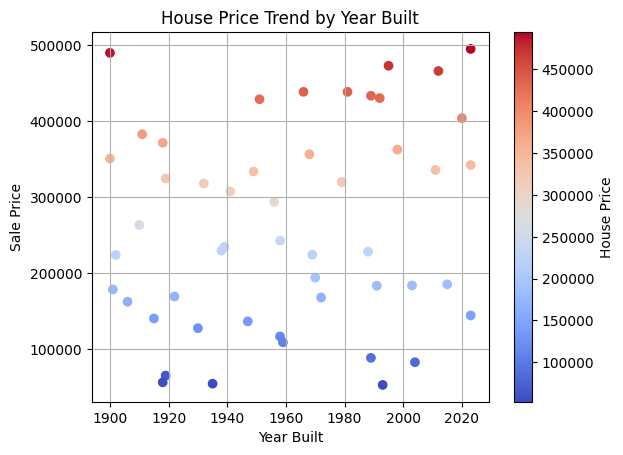

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data="House Prediction.csv"

df=pd.read_csv(data)

def PriceCategory(price):
    if price<150000:
        return "Low"
    if price<300000:
        return "Medium"
    else:
        return "High"
    
df['PriceLabel']=df['SalePrice'].apply(PriceCategory)
le=LabelEncoder()
df["PriceLabel_encoded"]=le.fit_transform(df['PriceLabel'])

x=df[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']]
y=df['PriceLabel']

x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.3, random_state=42)

scaler=StandardScaler()
x_trainScaled=scaler.fit_transform(x_train)
x_testScaled=scaler.transform(x_test)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_trainScaled,y_train)

y_pred=knn.predict(x_test)

print("\n===================ENTER HOUSE DETAILS==============================")

OverallQual=float(input("OverallQual(1-10):"))
GrLivArea=float(input("GrLivArea (sq ft):"))
GarageCars=float(input("GarageCars (0-4 ):"))
TotalBsmtSF=float(input("TotalBsmtSF (sq ft):"))
FullBath=float(input("FullBath (1-4):"))
YearBuilt=float(input("YearBuilt (eg: 1990):"))

userData=np.array([[OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt]])
userData_scaled=scaler.transform(userData)

prediction=knn.predict(userData_scaled)[0]
print(f"\nEntered Details → OverallQual:{OverallQual}, GrLivArea:{GrLivArea}, GarageCars:{GarageCars}, TotalBsmtSF:{TotalBsmtSF}, FullBath:{FullBath}, YearBuilt:{YearBuilt}")
print('\nPredicted Price category:\n',prediction)

print("Model Accuracy:",accuracy_score(y_test,y_pred))

plt.scatter(df['YearBuilt'],df['SalePrice'],c=df['SalePrice'],cmap='coolwarm')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('House Price Trend by Year Built')
plt.colorbar(label="House Price")
plt.grid(True)
plt.show()
